# A non-trivial toy example for multivariate regression with `mmbr`

Here I show with a toy simulation of 600 samples, 3000 variables phenotypes and 50 conditions of interest, just to see how the method works in terms of computational speed,
and roughly how well it works.

The simulation parameters are set to mimic the scale of GTEx cis-QTL analysis. I simulated 1 random effect variables per condition for these 50 conditions considered.

In [1]:
library(mmbr)
set.seed(2)
attach(mmbr_sim1(n=600,p=3000,r=50,s=1))

Loading required package: mashr
Loading required package: ashr


## Multivariate analysis

From the simulation we know that the number of total effect variables is about 50 (exactly 50 if there are no overlaps). Here I let `mmbr` to discover only 10 of them:

In [2]:
L = 10

In practice the priors are to be specified using `mashr` output, which will take a few hours to compute. But once computed it can be applied to all test units.

In [3]:
m_init = mmbr:::MashInitializer$new(list(V), 1, 1, 0)

Here I'm only using one weight and one prior covariance which is a very much degenerated MASH result. In practice there can usually be dozens of prior matrices in the MASH mixture with non-trivial weight. But the computation can also be parallelled. Here I only use one CPU core to time it.

In [3]:
start_time <- Sys.time()
B = susie(X,y,L=L,V=m_init,compute_objective=FALSE)
end_time <- Sys.time()

In [6]:
end_time - start_time

Time difference of 8.091513 mins

In [9]:
B$niter

[1] 14

Not to bad in compute time. Now check the result:

In [10]:
b_all = as.integer(apply(b,1,sum) != 0)

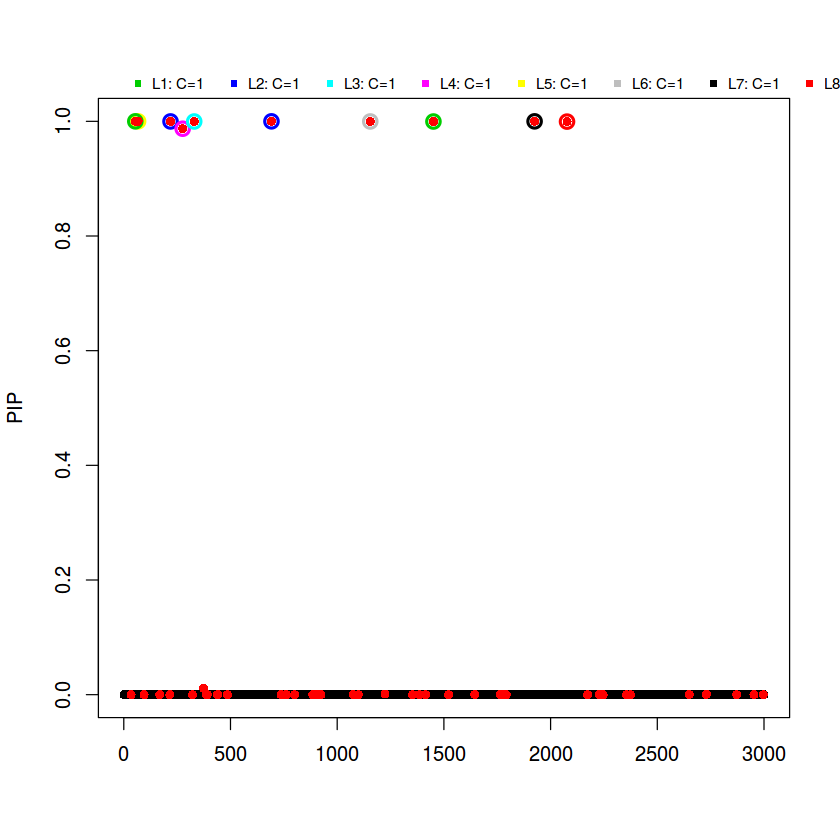

In [11]:
susieR::susie_plot(B,y='PIP',b=b_all)

I specified 10 variables but only see 9 here. I suspect there is signal overlap issue. But overall result is promising.

## A simpler case

Now I try it with 4 conditions each having 2 effect variables and see how it works:

In [2]:
rm(list=ls())
set.seed(2)
attach(mmbr_sim1(600,3000,4,2))

I still ask to look for 10 variables, hoping it will report back 8 correctly,

In [3]:
L = 10
m_init = mmbr:::MashInitializer$new(list(V), 1, 1, 0)
start_time <- Sys.time()
B = susie(X,y,L=L,V=m_init,compute_objective=FALSE)
end_time <- Sys.time()

In [4]:
end_time - start_time

Time difference of 7.262125 secs

In [5]:
B$niter

[1] 4

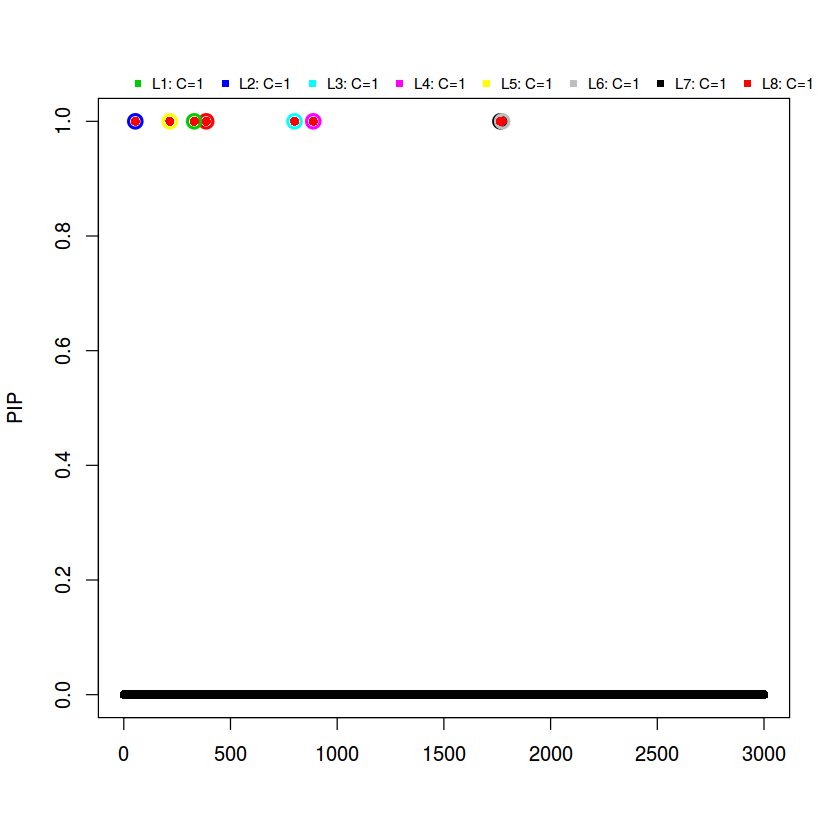

In [6]:
b_all = as.integer(apply(b,1,sum) != 0)
susieR::susie_plot(B,y='PIP',b=b_all)

which is indeed the case.